# Imports

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf
import random

%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Setup

In [2]:
import gym
env = gym.make("CartPole-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
state = env.reset()

In [4]:
state

array([ 0.01062081,  0.04586461, -0.04281273, -0.04624126])

In [5]:
pos, vel, ang, ang_vel = state
print(pos)
print(vel)
print(ang)
print(ang_vel)

0.010620811556207158
0.045864605985778906
-0.04281273243834095
-0.046241259488996544


In [6]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False  # probably no X server available, let's use our own rendering function

def render_cart_pole(env, state):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = state
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, state):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, state)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>


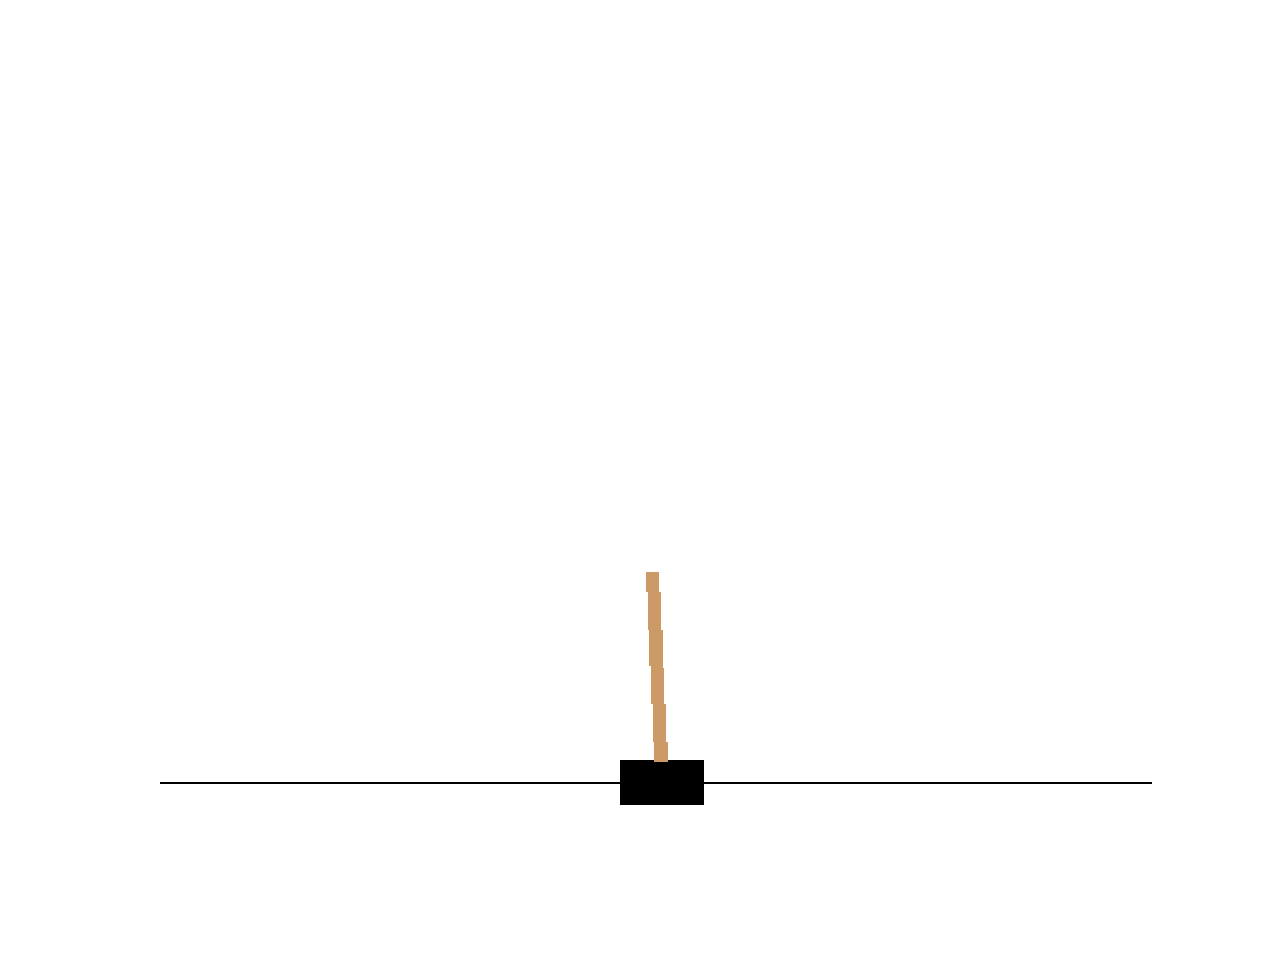

In [7]:
plot_cart_pole(env, state);

# Experimentation

In [8]:
env.action_space

Discrete(2)

In [9]:
env.observation_space

Box(4,)

## Take 1 step right

[-0.04461386  0.17240147  0.04122206 -0.28174247]
1.0
False


<IPython.core.display.Javascript object>


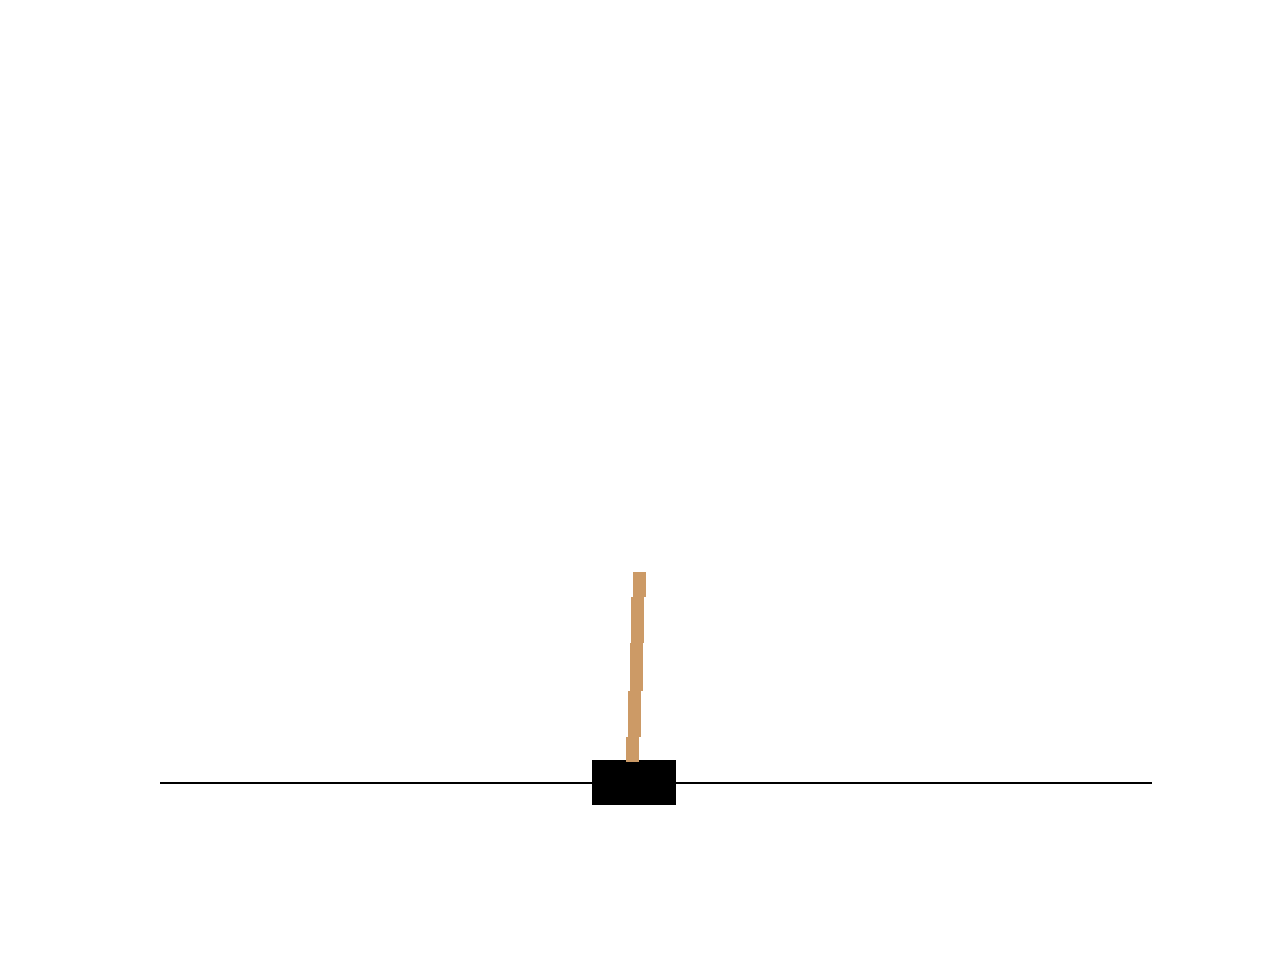

(-0.5, 599.5, 399.5, -0.5)

In [10]:
state = env.reset()
state, reward, done, info = env.step(1)
print(state)
print(reward)
print(done)

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, state)
plt.imshow(img)
plt.axis("off")

## Take 1 step left

[ 0.04113505 -0.23875679  0.04377458  0.30946966]
1.0
False


<IPython.core.display.Javascript object>


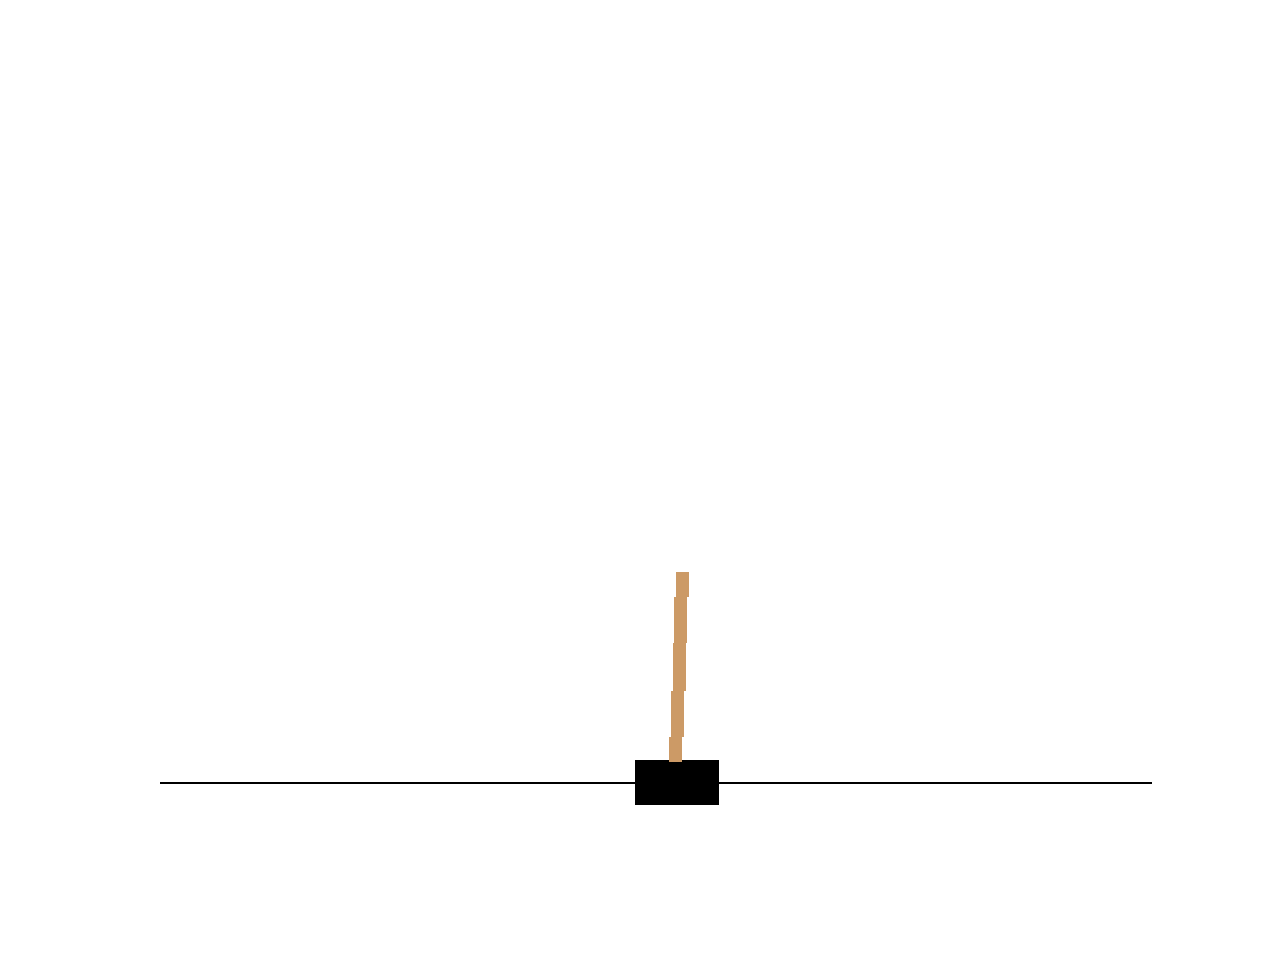

(-0.5, 599.5, 399.5, -0.5)

In [11]:
state = env.reset()
state, reward, done, info = env.step(0)
print(state)
print(reward)
print(done)

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, state)
plt.imshow(img)
plt.axis("off")

## Keep going left until fall

[-0.0440236  -0.22763709 -0.04011392  0.31767785]
[-0.04857634 -0.42216542 -0.03376037  0.59744529]
[-0.05701965 -0.61679909 -0.02181146  0.87930577]
[-0.06935563 -0.81161801 -0.00422534  1.16505257]
[-0.08558799 -1.0066847   0.01907571  1.45640776]
[-0.10572169 -1.20203549  0.04820386  1.75498854]
[-0.1297624  -1.39766966  0.08330363  2.06226537]
[-0.15771579 -1.59353632  0.12454894  2.37950949]
[-0.18958652 -1.78951854  0.17213913  2.70772844]
[-0.22537689 -1.98541494  0.2262937   3.04758953]


<IPython.core.display.Javascript object>


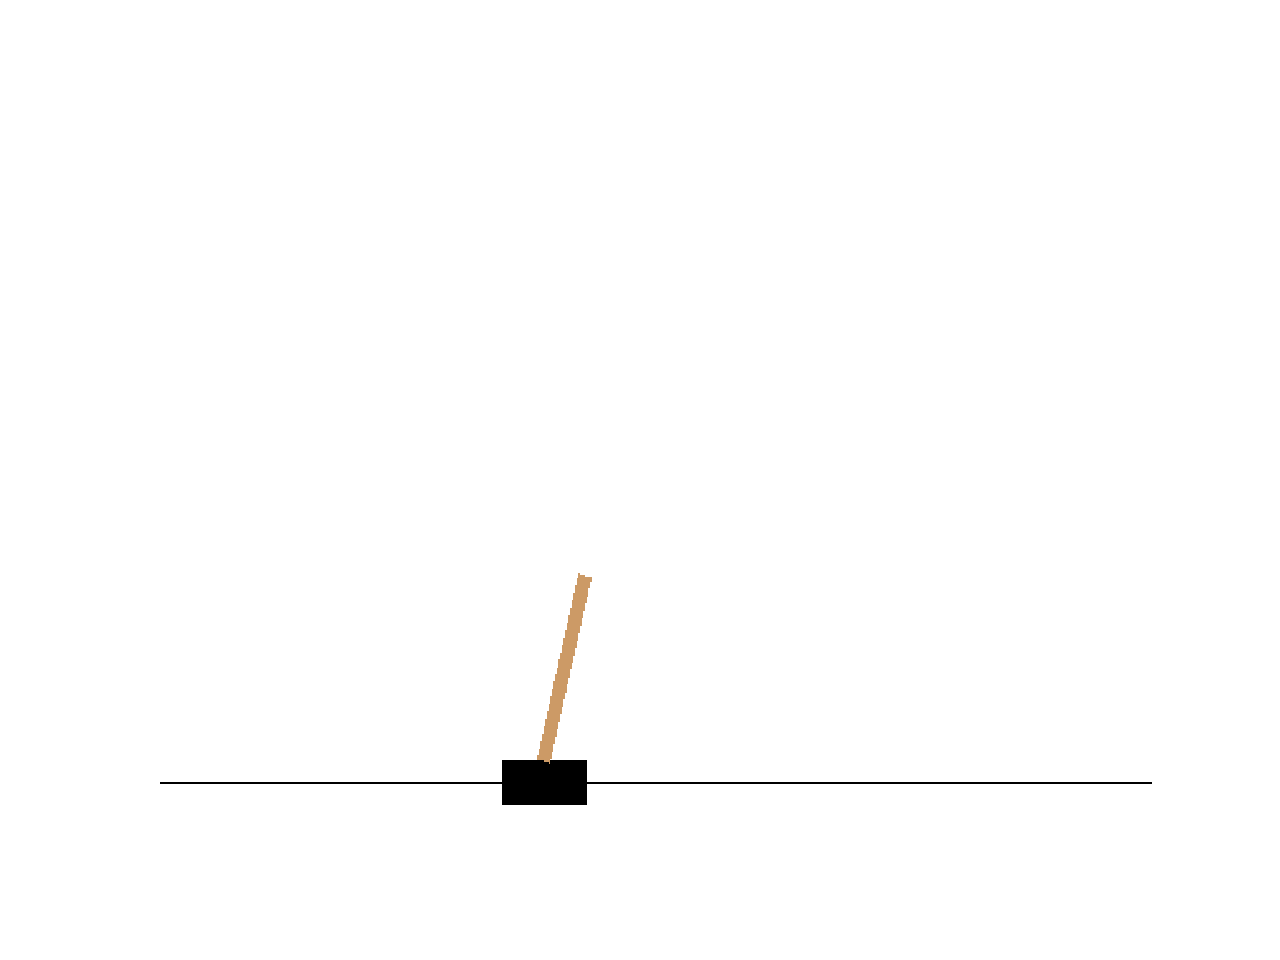

(-0.5, 599.5, 399.5, -0.5)

In [12]:
state = env.reset()
while True:
    state, reward, done, info = env.step(0)
    print(state)
    if done:
        break

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, state)
plt.imshow(img)
plt.axis("off")

## Keep going right until fall

[-0.04337418  0.17669382  0.03200641 -0.23571974]
[-0.0398403   0.37134421  0.02729201 -0.51813752]
[-0.03241341  0.56607149  0.01692926 -0.8020968 ]
[-2.10919848e-02  7.60957233e-01  8.87325182e-04 -1.08940656e+00]
[-0.00587284  0.95606747 -0.02090081 -1.38181094]
[ 0.01324851  1.15144391 -0.04853702 -1.68095597]
[ 0.03627739  1.34709341 -0.08215614 -1.98834888]
[ 0.06321926  1.54297526 -0.12192312 -2.30530735]
[ 0.09407876  1.73898576 -0.16802927 -2.63289716]
[ 0.12885848  1.93494031 -0.22068721 -2.9718578 ]


<IPython.core.display.Javascript object>


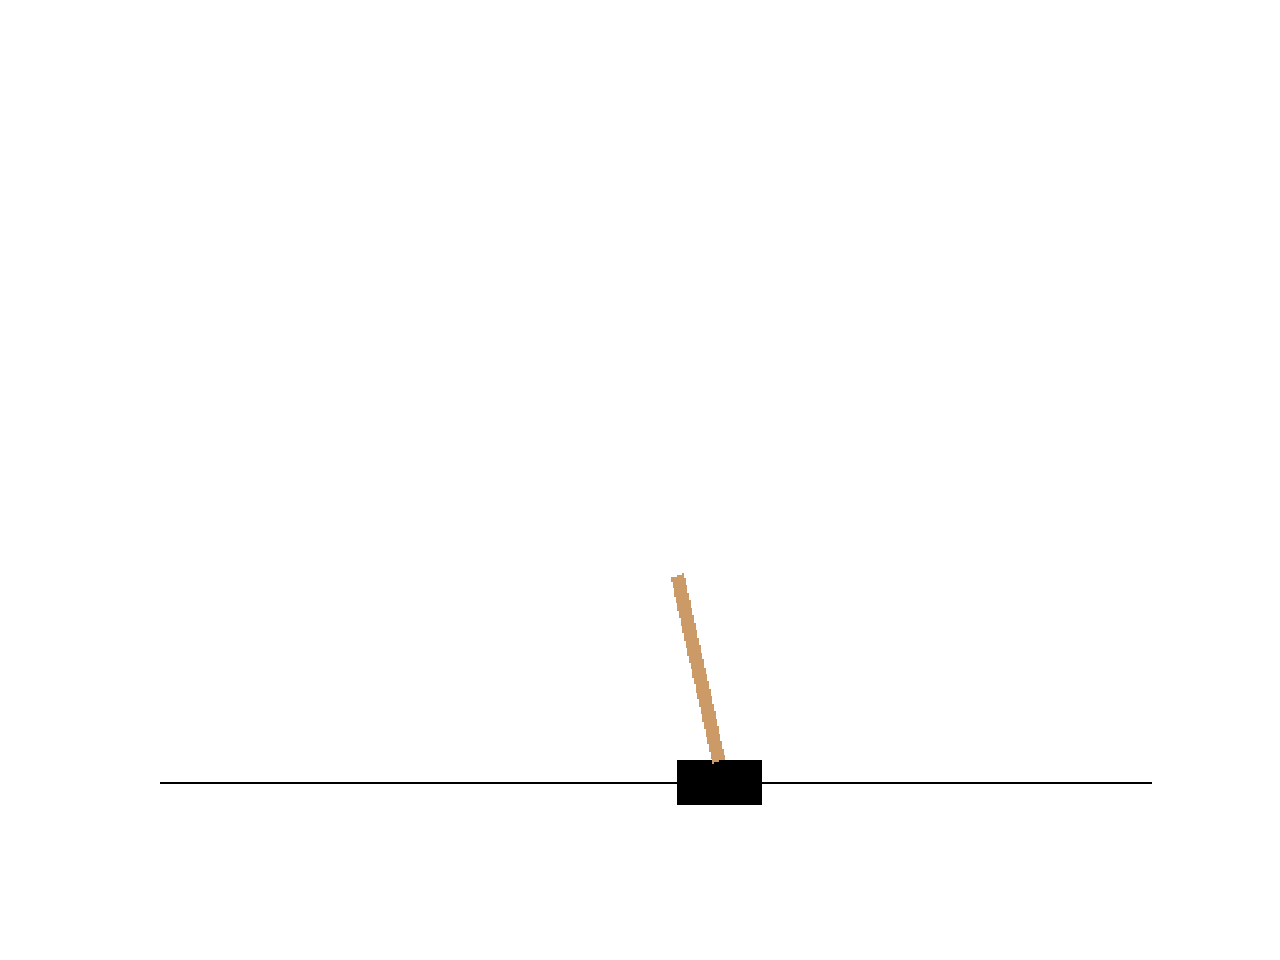

(-0.5, 599.5, 399.5, -0.5)

In [13]:
state = env.reset()
while True:
    state, reward, done, info = env.step(1)
    print(state)
    if done:
        break

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, state)
plt.imshow(img)
plt.axis("off")

# Improve Cart-Pole

## Animation functions

In [14]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

## Custom Policy
1. if angle and angular_velocity are both <0, then it is definitely failling left => move left to balance
2. if angle and angular_velocity are both >0, then it is definitely failling right => move right to balance
3. if above are both false => just move random for 1 step

In [15]:
def custom_policy(state, env):
    ang = state[2]
    ang_vel = state[3]
    if ang<0 and ang_vel<0: # falling left => move left
        return 0
    if ang>0 and ang_vel>0: # falling right => move right
        return 1    
    return env.action_space.sample() # play randomly

In [16]:
print(env._max_episode_steps)

200


In [27]:
def run_policy(num_of_episodes, max_steps=None):
    if max_steps is not None:
        env._max_episode_steps = max_steps
    print("Max episode steps:", env._max_episode_steps)
    frames = []
    rewards = []
    for episode in range(num_of_episodes):
        episode_reward = 0
        state = env.reset()
        for step in range(env._max_episode_steps):
            if episode==0: # check out 1 animation
                img = render_cart_pole(env, state)
                frames.append(img)

            action = custom_policy(state, env)
            state, reward, done, info = env.step(action)        
            episode_reward += reward
            if done:            
                break
        rewards.append(episode_reward)
        if episode%10 == 0:
            print(episode, episode_reward)
    return rewards, frames

### Try with the definition of `solved` as per the docs – 100 consecutive trials with default max_episode_steps

In [28]:
rewards, frames = run_policy(100)

Max episode steps: 200
0 200.0
10 200.0
20 200.0
30 200.0
40 200.0
50 200.0
60 200.0
70 200.0
80 200.0
90 200.0


In [29]:
np.mean(rewards), np.std(rewards), np.min(rewards), np.max(rewards)

(198.95, 10.447368089619513, 95.0, 200.0)

<IPython.core.display.Javascript object>


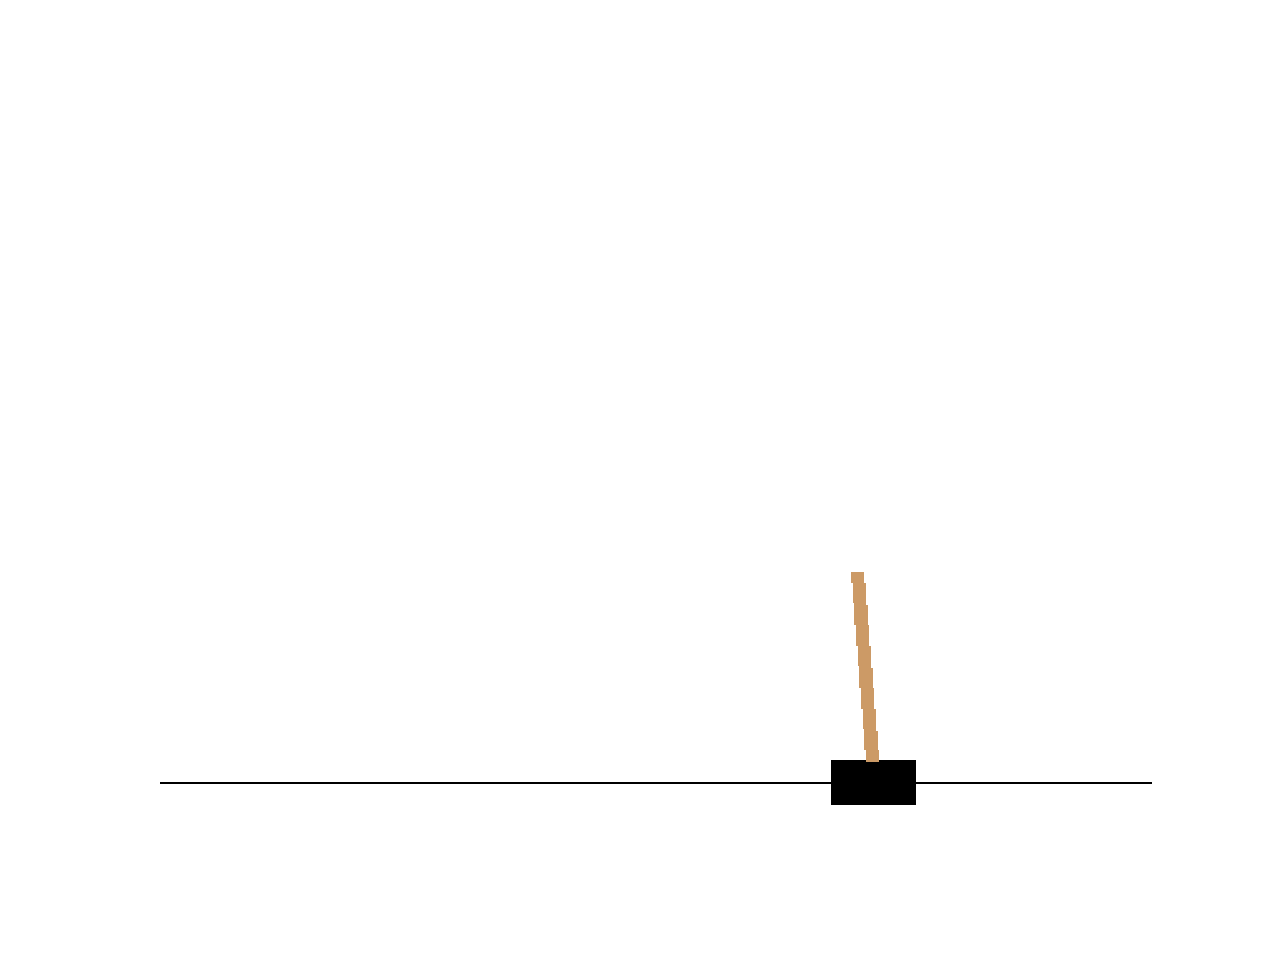

In [30]:
video = plot_animation(frames)
plt.show()

### Try with 100 consecutive trials with max_episode_steps as 1000

In [31]:
rewards, frames = run_policy(100, 1000)

Max episode steps: 1000
0 1000.0
10 1000.0
20 1000.0
30 250.0
40 460.0
50 1000.0
60 653.0
70 253.0
80 1000.0
90 642.0


In [32]:
np.mean(rewards), np.std(rewards), np.min(rewards), np.max(rewards)

(642.87, 264.3731701591521, 128.0, 1000.0)

<IPython.core.display.Javascript object>


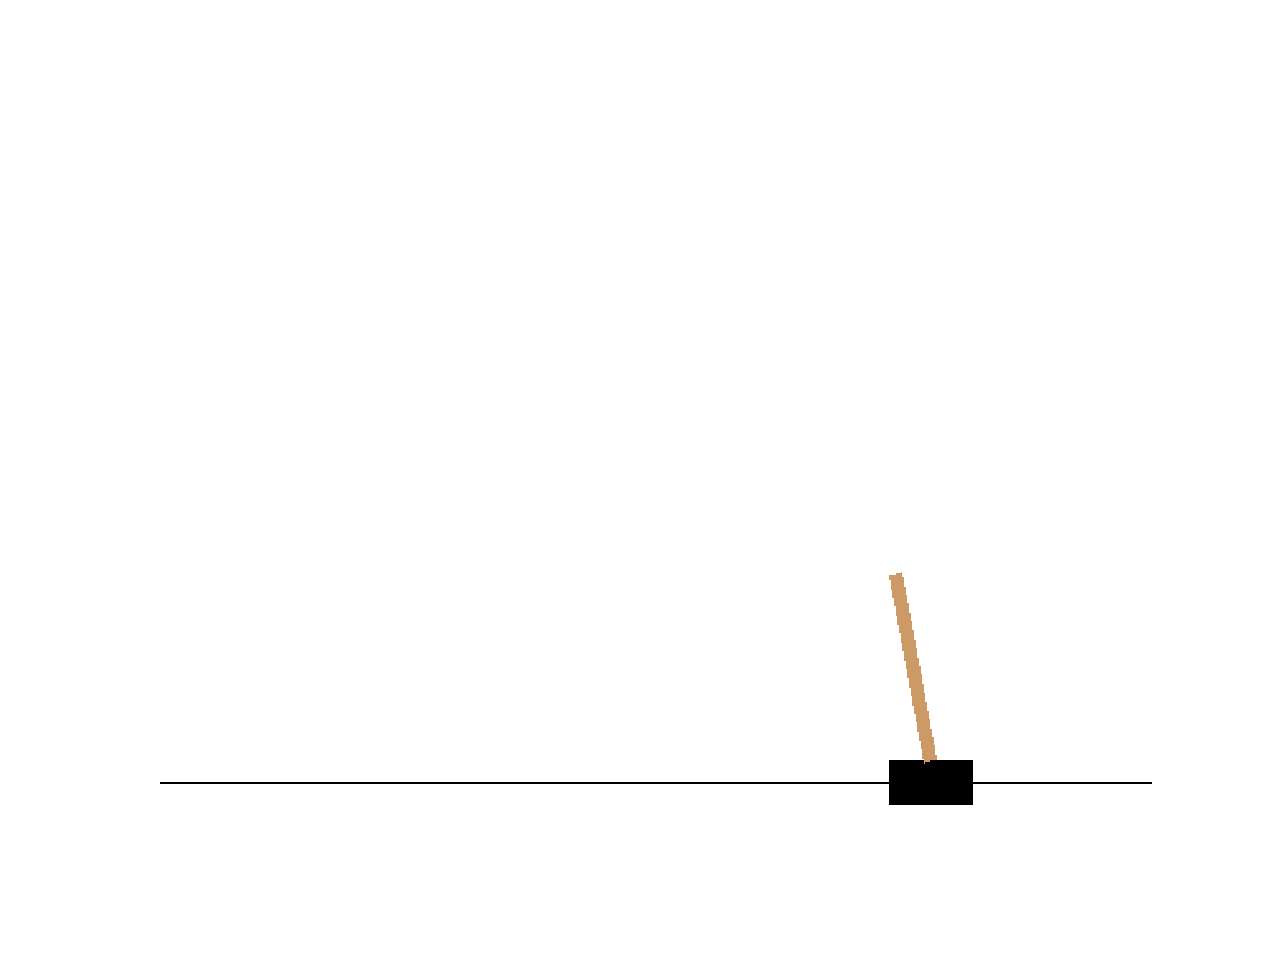

In [33]:
video = plot_animation(frames)
plt.show()

# Solve using Q-Learning

In [34]:
env = gym.make("CartPole-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [35]:
env.action_space

Discrete(2)

In [36]:
env.observation_space

Box(4,)

In [37]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

In [38]:
env.observation_space.high

array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)

In [39]:
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds

[(-4.8, 4.8),
 (-3.4028235e+38, 3.4028235e+38),
 (-0.41887903, 0.41887903),
 (-3.4028235e+38, 3.4028235e+38)]

In [40]:
# limit the range of velocity just to avoid large numbers (its not playing an important role as we have picked bin_size=1 for it)
state_bounds[1] = (-1.0, 1.0)

# choose the range of angular_velocity same as angle (basically limit the max angle it can turn in 1 sec)
state_bounds[3] = state_bounds[2]

state_bounds

[(-4.8, 4.8),
 (-1.0, 1.0),
 (-0.41887903, 0.41887903),
 (-0.41887903, 0.41887903)]

In [43]:
NUM_BINS = (1, 1, 6, 3) # should be obtained via experimentation/GridSearch treating this as a hyperparam

In [44]:
qtable = np.zeros(NUM_BINS + (env.action_space.n,))

In [45]:
state = env.reset()
state

array([0.03639097, 0.04354858, 0.04074088, 0.02926724])

In [46]:
def state_to_bin(state):
    bin_indexes = []
    for i in range(len(state)):                
        if state[i]<=state_bounds[i][0]:
            bin_index = 0
        elif state[i]>=state_bounds[i][1]:
            bin_index = NUM_BINS[i]-1
        else:
            param_range = state_bounds[i][1] - state_bounds[i][0] # total range from min => max
            # convert the observed param value to be in the scale of (0, max-min) => by subtracting min
            # this helps evaluating bin_index easy (indexes are integers starting from 0)
            param_obs = state[i]-(state_bounds[i][0])
            bin_index = int(param_obs/(param_range/NUM_BINS[i]))
            
        bin_indexes.append(bin_index)
    
    return tuple(bin_indexes)

In [47]:
state_bin = state_to_bin(state)
state_bin

(0, 0, 3, 1)

In [48]:
SOLVED_AVG_STEPS = 195.0
SOLVED_CONSECUTIVE_TRIALS = 100

In [49]:
total_episodes = 1000

min_learning_rate = 0.1
gamma = 1.0

# Exploration parameters
min_epsilon = 0.01

In [50]:
import math
def get_exploration_rate(t):
    return max(min_epsilon, min(1, 1.0 - math.log10((t+1)/25)))

def get_learning_rate(t):
    return max(min_learning_rate, min(0.5, 1.0 - math.log10((t+1)/25)))

In [51]:
qtable = np.zeros(NUM_BINS + (env.action_space.n,))

episode_steps = []
streak = 0

for episode in range(total_episodes):
    if episode%50 == 0:
        print("*"*50)
        print("Episode", episode)
    state = env.reset()
    done = False
    
    epsilon = get_exploration_rate(episode)
    learning_rate = get_learning_rate(episode)    
    
    for step in range(env._max_episode_steps):
        state_bin = state_to_bin(state) # discretize continuous state
        
        # explore or exploit
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample() # random
        else:
            action = np.argmax(qtable[state_bin]) # action with the highest Q-value, for a given state
        
        # take action
        new_state, reward, done, info = env.step(action)
        new_state_bin = state_to_bin(new_state)

        # update Q-table
        qtable[state_bin + (action,)] += learning_rate * (reward + gamma*np.max(qtable[new_state_bin]) - qtable[state_bin + (action,)])
        
        state = new_state
        
        if done:
            if streak == 0 and step > SOLVED_AVG_STEPS:
                episode_steps = []
            episode_steps.append(step)
            break 
            
    if np.mean(episode_steps) >= SOLVED_AVG_STEPS:
        streak += 1
    else:
        streak = 0
        
    if streak >= SOLVED_CONSECUTIVE_TRIALS:
        print("Solved in %d episodes" % episode)
        break

**************************************************
Episode 0
**************************************************
Episode 50
**************************************************
Episode 100
**************************************************
Episode 150
**************************************************
Episode 200
**************************************************
Episode 250
**************************************************
Episode 300
Solved in 310 episodes


## Alternate way of testing the policy

In [52]:
'''
    CartPole-v0 defines "solving" as getting average reward of 195.0 over 100 consecutive trials.
'''

SOLVED_AVG_STEPS = 195.0
SOLVED_CONSECUTIVE_TRIALS = 100

def test_policy():
    episode_steps = []
    for episode in range(SOLVED_CONSECUTIVE_TRIALS):
        state = env.reset()
        done = False
        
        for step in range(env._max_episode_steps):
            state_bin = state_to_bin(state) # discretize continuous state
            action = np.argmax(qtable[state_bin]) # action with the highest Q-value, for a given state
            new_state, reward, done, info = env.step(action)
            state = new_state
            
            if done:                
                episode_steps.append(step)
                break
        
        if np.mean(episode_steps) < SOLVED_AVG_STEPS:            
            return False
        
    return True

In [53]:
qtable = np.zeros(NUM_BINS + (env.action_space.n,))

for episode in range(total_episodes):
    if episode%10 == 0:
        print("*"*50)
        print("Episode", episode)
    state = env.reset()
    done = False
    
    epsilon = get_exploration_rate(episode)
    learning_rate = get_learning_rate(episode)    
    
    for step in range(env._max_episode_steps):
        state_bin = state_to_bin(state) # discretize continuous state
        
        # explore or exploit
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample() # random
        else:
            action = np.argmax(qtable[state_bin]) # action with the highest Q-value, for a given state
        
        # take action
        new_state, reward, done, info = env.step(action)
        new_state_bin = state_to_bin(new_state)

        # update Q-table
        qtable[state_bin + (action,)] += learning_rate * (reward + gamma*np.max(qtable[new_state_bin]) - qtable[state_bin + (action,)])
        
        state = new_state
        
        if done:
            break
            
    if test_policy():
        print("Solved in %d episodes" % episode)
        break

**************************************************
Episode 0
**************************************************
Episode 10
**************************************************
Episode 20
**************************************************
Episode 30
**************************************************
Episode 40
Solved in 42 episodes


# Solve using Neural Network Policy

In [54]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [55]:
import tensorflow as tf

# neural network architecture
n_inputs = env.observation_space.shape[0]
n_hidden = 4 # simple enough task, don't need more hidden layers
n_outputs = 1 # will output the probability of accelerating in 1 direction (left)
initializer = tf.contrib.layers.variance_scaling_initializer()

# build the Neural Network
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, 
                         n_hidden, 
                         activation=tf.nn.elu, 
                         kernel_initializer=initializer)
outputs = tf.layers.dense(hidden, 
                          n_outputs, 
                          activation=tf.nn.sigmoid, 
                          kernel_initializer=initializer)

# select a random action based on estimated probabilities
p_left_and_right = tf.concat(axis=1, values=[outputs, 1-outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

init = tf.global_variables_initializer()

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**Randomly initialize and play 1 game and see what the Neural Network does**

(there is no training – so its just going to spit random actions)

In [56]:
frames = []

with tf.Session() as sess:
    init.run()
    obs = env.reset()
    for step in range(env._max_episode_steps):
        img = render_cart_pole(env, obs)
        frames.append(img)
        action_val = action.eval(feed_dict={X:obs.reshape(1, n_inputs)})
        obs, reward, done, info = env.step(action_val[0][0])
        if done:
            break
    
env.close()

<IPython.core.display.Javascript object>


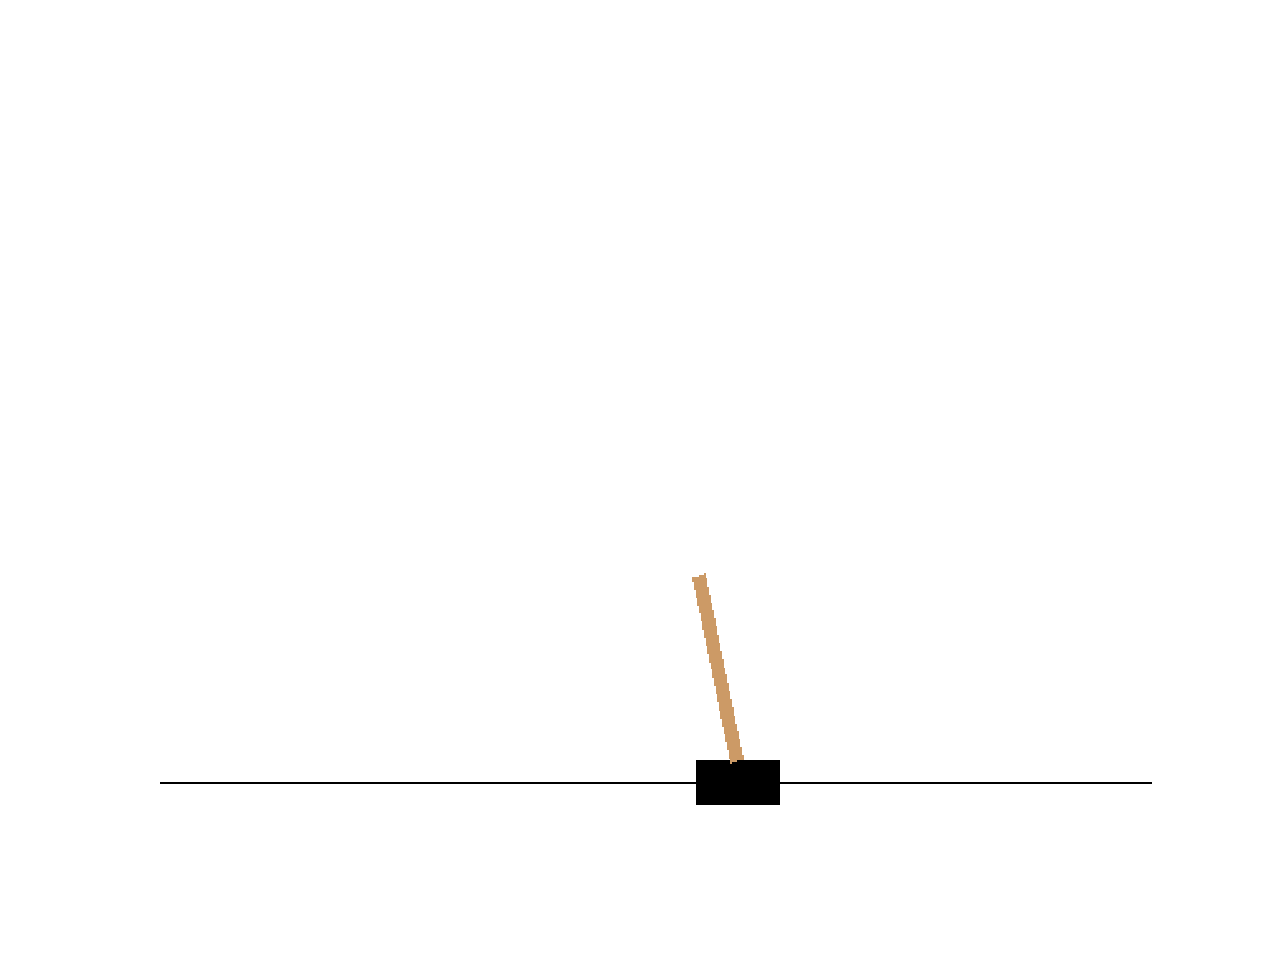

In [57]:
video = plot_animation(frames)
plt.show()

**See if the NN can learn the basic policy of going left if `ang < 0` and going right if `ang > 0`**

In [58]:
reset_graph()

n_inputs = env.observation_space.shape[0]
n_hidden = 4 
n_outputs = 1 
initializer = tf.contrib.layers.variance_scaling_initializer()

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
y = tf.placeholder(tf.float32, shape=[None, n_outputs])

hidden = tf.layers.dense(X, 
                         n_hidden, 
                         activation=tf.nn.elu, 
                         kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits) # probability of action0 (left)
p_left_and_right = tf.concat(axis=1, values=[outputs, 1-outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cross_entropy)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

play 10 different environments in parallel, and train for 1000 iterations

In [59]:
n_environments = 10
n_iterations = 1000

envs = [gym.make("CartPole-v0") for _ in range(n_environments)]
observations = [env.reset() for env in envs]

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):        
        # if angle<0, we want proba(left)=1 else proba(left)=0
        target_probas = np.array([([1.] if obs[2]<0 else [0.]) for obs in observations])
        action_val, _ = sess.run([action, training_op], feed_dict={X:np.array(observations), y:target_probas})
        
        for env_index, env in enumerate(envs):
            obs, reward, done, info = env.step(action_val[env_index][0])
            observations[env_index] = obs if not done else env.reset()
    saver.save(sess, "./my_basic_nn_policy.ckpt")

for env in envs:
    env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [105]:
def render_policy_net(model_path, action, X, n_max_steps=env._max_episode_steps):
    frames = []
    env = gym.make("CartPole-v0")
    obs = env.reset()
    with tf.Session() as sess:
        saver.restore(sess, model_path)
        for step in range(n_max_steps):
            img = render_cart_pole(env, obs)
            frames.append(img)
            action_val = action.eval(feed_dict={X:obs.reshape(1, n_inputs)})
            obs, reward, done, info = env.step(action_val[0][0])
            if done:
                print("Steps:", step)
                break
                
    env.close()
    return frames

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
INFO:tensorflow:Restoring parameters from ./my_basic_nn_policy.ckpt
Steps: 43


<IPython.core.display.Javascript object>


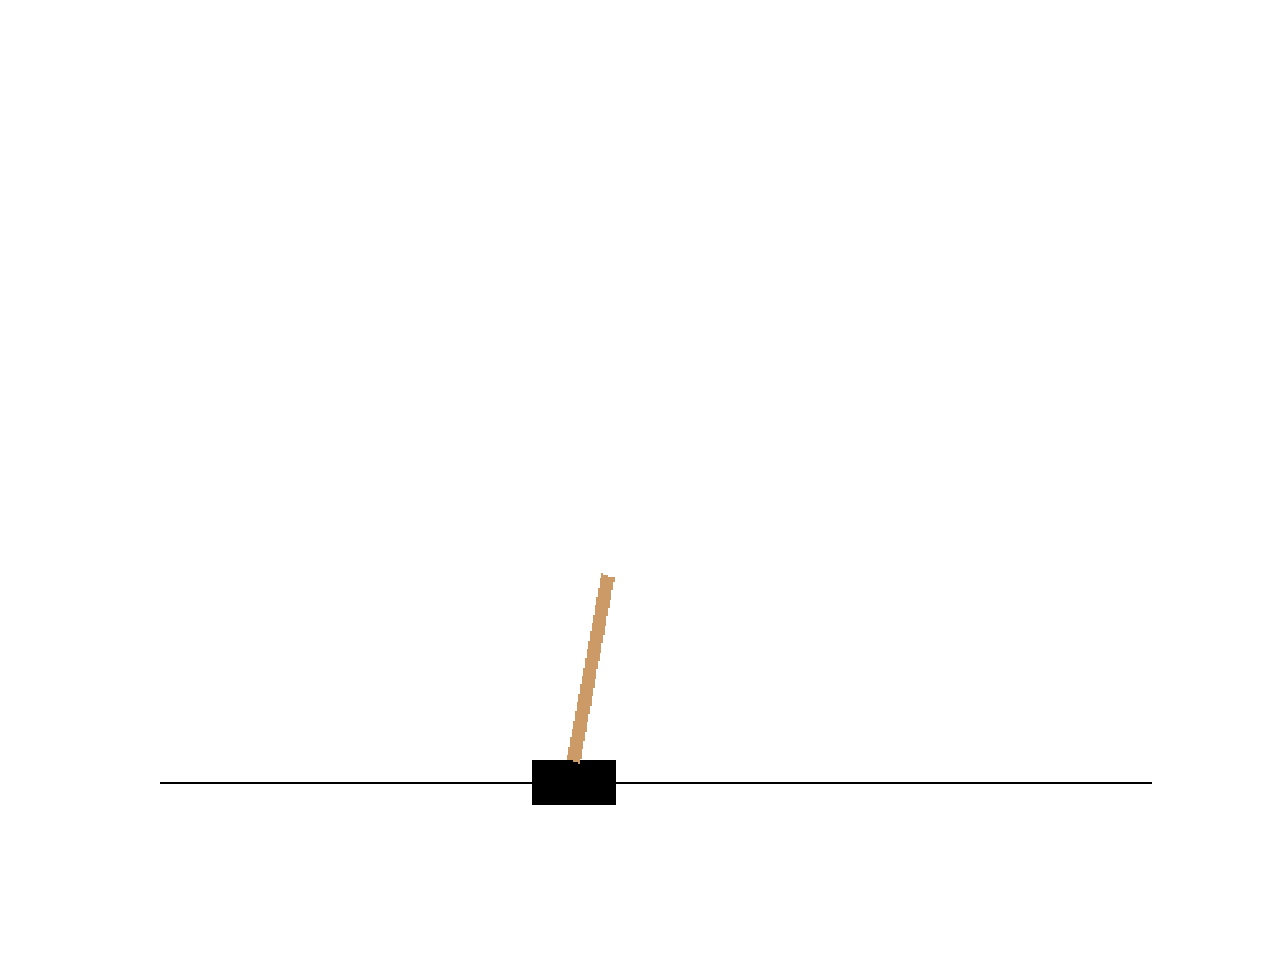

In [61]:
frames = render_policy_net("./my_basic_nn_policy.ckpt", action, X)
video = plot_animation(frames)
plt.show()

**Observation:** Not that bad, now let's see if it can learn a better policy on its own

## Use Policy Gradients

**Use NN to discover an optimal policy (instead of learning a policy provided by us)**

In [98]:
reset_graph()

n_inputs = env.observation_space.shape[0]
n_hidden = 4 
n_outputs = 1 
initializer = tf.contrib.layers.variance_scaling_initializer()

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

hidden = tf.layers.dense(X, 
                         n_hidden, 
                         activation=tf.nn.elu, 
                         kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits) # probability of action0 (left)
p_left_and_right = tf.concat(axis=1, values=[outputs, 1-outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

# since we are acting as if the chosen action is the best possible action (and studying the results afterwards)
# the target probability must be 1.0 if the chosen action is action0 (left) and 0.0 if it is action1 (right)
y = 1. - tf.to_float(action)
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)

# we ll call compute_gradients() instead of minimize()
# (as we want to tweak the gradients before we apply them)
# (basically, we will know whether the current step was good/bad by doing further steps and reaching end)
grads_and_vars = optimizer.compute_gradients(cross_entropy)

gradients = [grad for grad, var in grads_and_vars] # used later while training

# we need 1 placeholder per gradient_vector (as we want to update them later on by studying the further actions, while training)
gradient_placeholders = []
updated_grads_and_vars = []
for grad, var in grads_and_vars:
    grad_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(grad_placeholder)
    updated_grads_and_vars.append((grad_placeholder, var))

training_op = optimizer.apply_gradients(updated_grads_and_vars)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [99]:
def discount_rewards(rewards, discount_rate):
    discounted_rewards = np.zeros(len(rewards))
    cumulative_reward = 0
    for step in reversed(range(len(rewards))):
        cumulative_reward = rewards[step] + cumulative_reward*discount_rate
        discounted_rewards[step] = cumulative_reward
    return discounted_rewards

In [100]:
discount_rewards([10, 0, -50], 0.8)

array([-22., -40., -50.])

In [101]:
def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(each-reward_mean)/reward_std for each in all_discounted_rewards]

In [102]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], 0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [103]:
def train_nn_policy_gradients(n_iterations):
    env = gym.make("CartPole-v0")

    n_episodes_per_update = 10 # train the policy evert 10 episodes (don't wait for it to die)
    save_iterations = 10 # save the model every 10 iterations (why?)
    discount_rate = 0.95

    with tf.Session() as sess:
        init.run()
        for iteration in range(n_iterations):
            if iteration%50 == 0:
                print("Iteration", iteration)
            all_rewards = [] # raw rewards for all the episodes
            all_gradients = [] # gradients saved at each step of each episode
            for game in range(n_episodes_per_update):
                current_rewards = [] # raw rewards from the current episode
                current_gradients = [] # all gradients from the current episode
                obs = env.reset()            
                for step in range(env._max_episode_steps):
                    action_val, gradients_val = sess.run([action, gradients], feed_dict={X:obs.reshape(1, n_inputs)})
                    obs, reward, done, info = env.step(action_val[0][0])
                    current_rewards.append(reward)
                    current_gradients.append(gradients_val)
                    if done:
                        break
                all_rewards.append(current_rewards)
                all_gradients.append(current_gradients)

            # at this point, we have run the policy for 10 episodes,
            # and we are ready for a policy update (study how we did and update)
            all_rewards = discount_and_normalize_rewards(all_rewards, discount_rate)
            feed_dict = {}
            for var_index, gradient_placeholder in enumerate(gradient_placeholders):
                mean_gradients = np.mean([reward*all_gradients[game_index][step][var_index] 
                                         for game_index, rewards in enumerate(all_rewards)
                                         for step, reward in enumerate(rewards)], axis=0)
                feed_dict[gradient_placeholder] = mean_gradients

            sess.run(training_op, feed_dict=feed_dict)
            if iteration%save_iterations == 0:
                saver.save(sess, "./my_nn_policy_pg.ckpt")

    print("Done.")
    env.close()

In [104]:
train_nn_policy_gradients(250)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Iteration 0
Iteration 50
Iteration 100
Iteration 150
Iteration 200
Done.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
INFO:tensorflow:Restoring parameters from ./my_nn_policy_pg.ckpt
Steps: 199


<IPython.core.display.Javascript object>


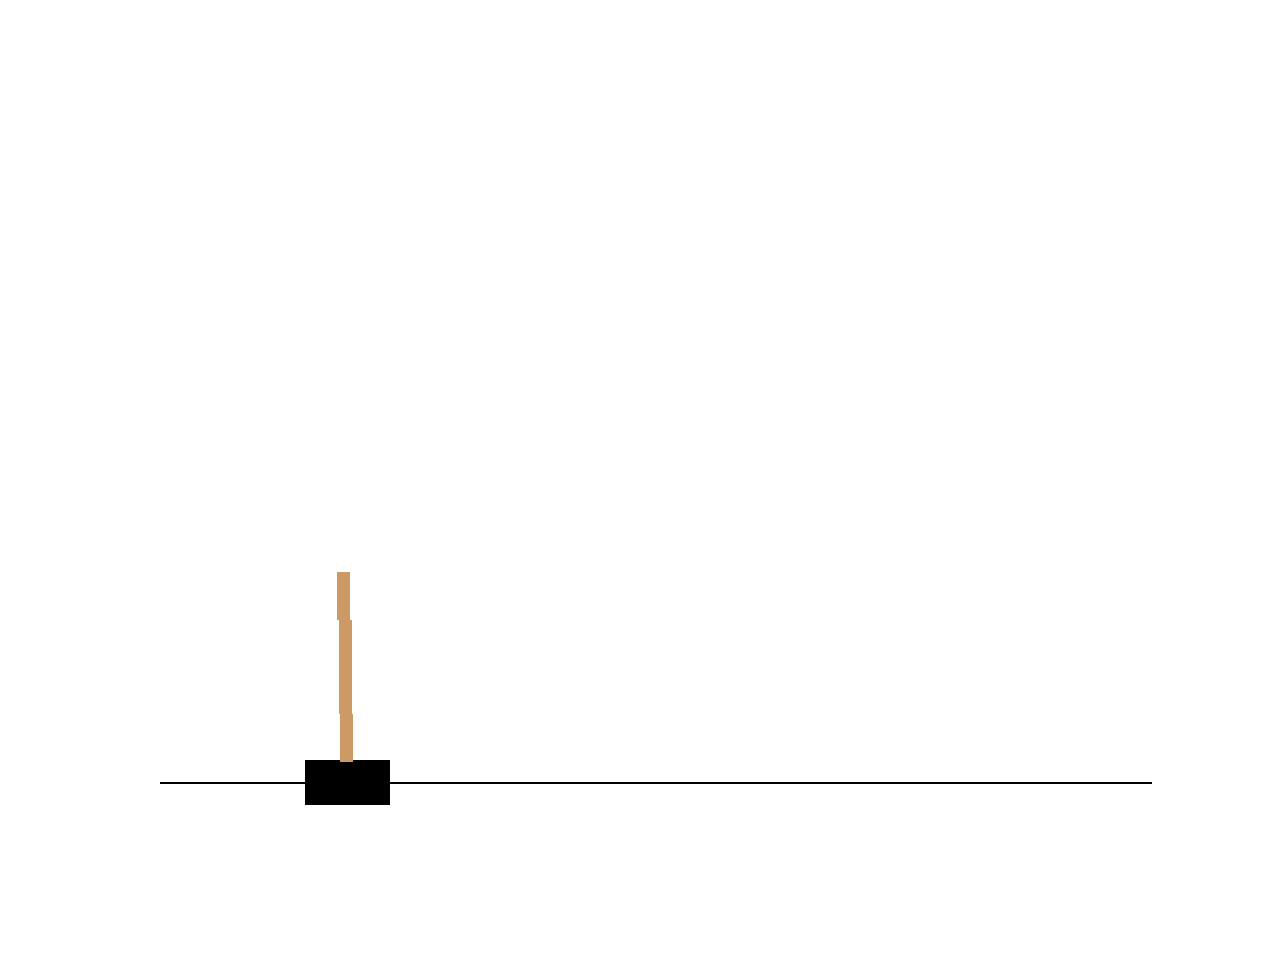

In [106]:
frames = render_policy_net("./my_nn_policy_pg.ckpt", action, X)
video = plot_animation(frames)
plt.show()

**Observation:** the policy was able to learn to balance the pole on the cart – but it is still moving a lot horizontally and risks going off the screen

Let's see what happens with more iterations

In [107]:
reset_graph()

n_inputs = env.observation_space.shape[0]
n_hidden = 4 
n_outputs = 1 
initializer = tf.contrib.layers.variance_scaling_initializer()

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

hidden = tf.layers.dense(X, 
                         n_hidden, 
                         activation=tf.nn.elu, 
                         kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits) # probability of action0 (left)
p_left_and_right = tf.concat(axis=1, values=[outputs, 1-outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

# since we are acting as if the chosen action is the best possible action (and studying the results afterwards)
# the target probability must be 1.0 if the chosen action is action0 (left) and 0.0 if it is action1 (right)
y = 1. - tf.to_float(action)
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)

# we ll call compute_gradients() instead of minimize()
# (as we want to tweak the gradients before we apply them)
# (basically, we will know whether the current step was good/bad by doing further steps and reaching end)
grads_and_vars = optimizer.compute_gradients(cross_entropy)

gradients = [grad for grad, var in grads_and_vars] # used later while training

# we need 1 placeholder per gradient_vector (as we want to update them later on by studying the further actions, while training)
gradient_placeholders = []
updated_grads_and_vars = []
for grad, var in grads_and_vars:
    grad_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(grad_placeholder)
    updated_grads_and_vars.append((grad_placeholder, var))

training_op = optimizer.apply_gradients(updated_grads_and_vars)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [108]:
train_nn_policy_gradients(450)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Iteration 0
Iteration 50
Iteration 100
Iteration 150
Iteration 200
Iteration 250
Iteration 300
Iteration 350
Iteration 400
Done.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
INFO:tensorflow:Restoring parameters from ./my_nn_policy_pg.ckpt
Steps: 199


<IPython.core.display.Javascript object>


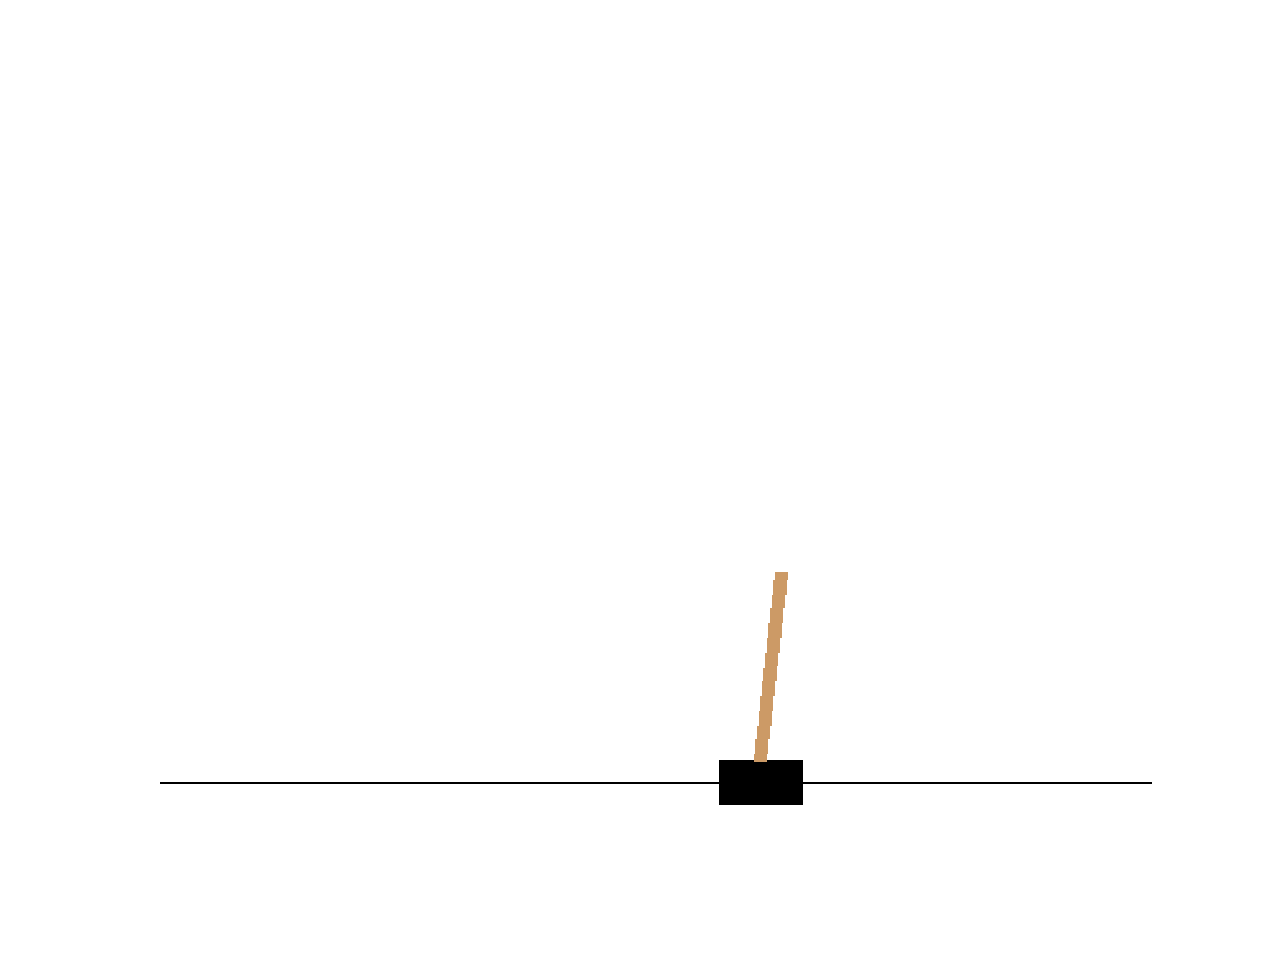

In [109]:
frames = render_policy_net("./my_nn_policy_pg.ckpt", action, X)
video = plot_animation(frames)
plt.show()

**Observation:** bit bitter, stays on the screen more